In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving AirbnbData.csv to AirbnbData.csv


In [ ]:
data = pd.read_csv("AirbnbData.csv")
data.head() # DISPLAYS FIRST 5 DATA COLOUMNS 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,21-10-2013,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,26-12-2014,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,01-10-2015,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,11-08-2019,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,28-07-2019,0.22,9,355


DATA CLEANING


In [ ]:
data.shape

(7907, 16)

In [ ]:
#DataSet Description 
# Consists of 16 columns 
#ID - A unique code given to each user 
#HOST_ID - An ID provided to each AirBnb location
#LATITUDE - Latitude of the AirBnb Location
#LONGITUDE - Longitude of the AirBnb Location
#PRICE - Cost per night in the room
#MINIMUM_NIGHTS - Miniumum duration of stay
#NUMBER_OF_REVIEWS - Reviews available for a particular location
#LAST_REVIEW - Date of the last review of the AirBnb
#REVIEWS_PER_MONTH - Number of user reviews per month
#CLACULATED_HOST_LISTING_COUNT - Number of total customers who have stayed in a particular AirBnb
#AVAILABLITY_365 - Number of days available in the year
#NAME- Name of the AirBnb
#HOST_NAME- The owner of the AirBnb
#NEIGHBOURHOOD_GROUP - The region the AirBnb is located 
#NEIGHBOURHOOD - Name of the locality of the AirBnb
#ROOM_TYPE - Type of room ( private / shared / whole apartment or house )

In [ ]:
data.shape # Gives the dimensions of the data set
data.info()  # Gives the information of the type of data in each coloumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [ ]:
#FIND NUMBER OF NULL VALUES IN EACH COLOUMN 
data.isnull().sum()
#AS SEEN FROM THE TABLE BELOW , LAST_REVIEW AND REVIEWS PER MONTH HAVE A LOT OF MISSING VALUES AND THE COLOUMNS CAN THUS BE DROPPED

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
drop=["last_review","reviews_per_month"]
data.drop(drop, inplace=True, axis=1)
data.shape
#IT CAN BE SEEN THAT NUMBER OF COLOUMNS REDUCES BY 2 
#NOW THERE ARE 14 USABLE COLOUMNS IN THE DATA SET

(7907, 14)

In [ ]:
data.columns
data.nunique()
#NUMBER OF COLOUMNS WITH NUMBER OF UNIQUE ROWS

id                                7907
name                              7455
host_id                           2705
host_name                         1833
neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
calculated_host_listings_count      55
availability_365                   359
dtype: int64

In [ ]:
data.fillna("NULL", inplace=True)
#FILL THE EMPTY NAME COLOUMN WITH MODE VALUE TO AVOID ERRORS
data.isnull().sum()
#NOW THERE ARE NO ROWS WITH EMPTY VALUES

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#CAPITALISATION FOR ALL CATEGORICAL DATA
data['name'] = data['name'].str.upper()
data['host_name'] = data['host_name'].str.upper()
data['neighbourhood_group'] = data['neighbourhood_group'].str.upper()
data['neighbourhood'] = data['neighbourhood'].str.upper()
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,FRANCESCA,NORTH REGION,WOODLANDS,1.44255,103.79580,Private room,83,180,1,2,365
1,50646,PLEASANT ROOM ALONG BUKIT TIMAH,227796,SUJATHA,CENTRAL REGION,BUKIT TIMAH,1.33235,103.78521,Private room,81,90,18,1,365
2,56334,COZICOMFORT,266763,FRANCESCA,NORTH REGION,WOODLANDS,1.44246,103.79667,Private room,69,6,20,2,365
3,71609,ENSUITE ROOM (ROOM 1 & 2) NEAR EXPO,367042,BELINDA,EAST REGION,TAMPINES,1.34541,103.95712,Private room,206,1,14,9,353
4,71896,B&B ROOM 1 NEAR AIRPORT & EXPO,367042,BELINDA,EAST REGION,TAMPINES,1.34567,103.95963,Private room,94,1,22,9,355


In [ ]:
#DETECTION AND REMOVAL OF OUTLIERS 

Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

data_filtered=data[(data['price']>lower_limit) & (data['price']<upper_limit)]
data_filtered.shape
print(data_filtered.shape)

(7565, 14)


In [ ]:
Q1 = data_filtered.minimum_nights.quantile(0.25)
Q3 = data_filtered.minimum_nights.quantile(0.75)
IQR = Q3 - Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

data_filtered=data[(data['minimum_nights']>lower_limit) & (data['minimum_nights']<upper_limit)]
data_filtered.shape
print(data_filtered.shape)

(6500, 14)


EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


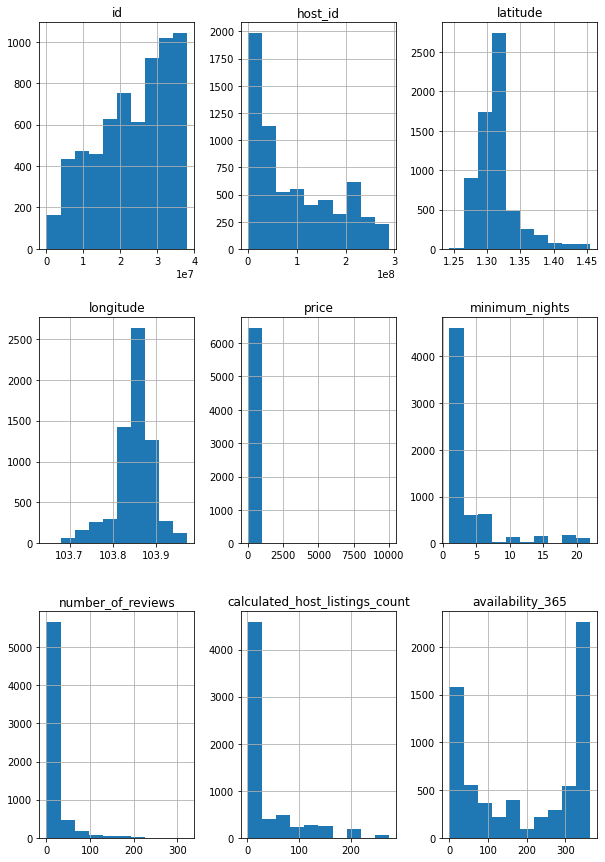

In [ ]:
#GRAPH VISUALISATION 

fig = plt.figure(figsize = (10,15))
ax = fig.gca()
data_filtered.hist(ax=ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x2880 with 0 Axes>

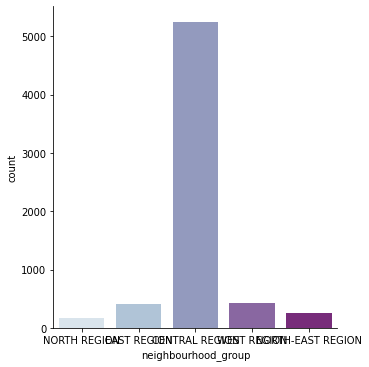

<Figure size 720x1080 with 0 Axes>

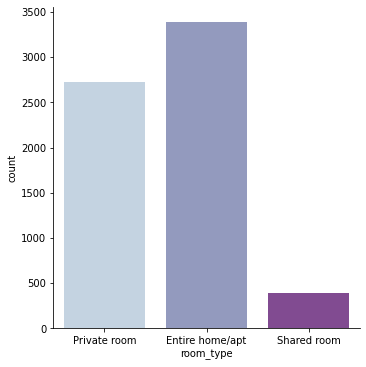

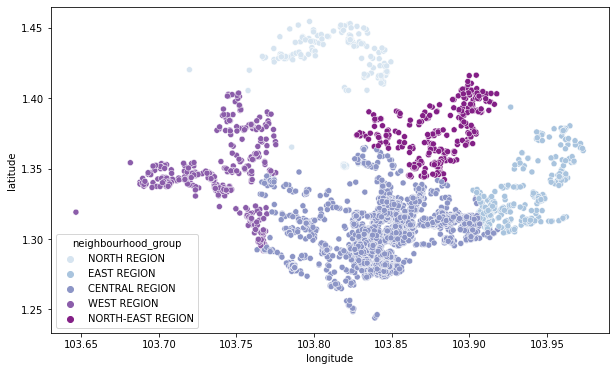

In [ ]:
plt.figure(figsize=(10,40))
sns.catplot(x='neighbourhood_group',kind="count",palette='BuPu',data=data_filtered)

plt.figure(figsize=(10,15))
sns.catplot(x='room_type',kind="count",palette='BuPu',data=data_filtered)

plt.figure(figsize=(10,6))
sns.scatterplot(data_filtered.longitude,data_filtered.latitude,hue=data_filtered.neighbourhood_group,palette='BuPu')

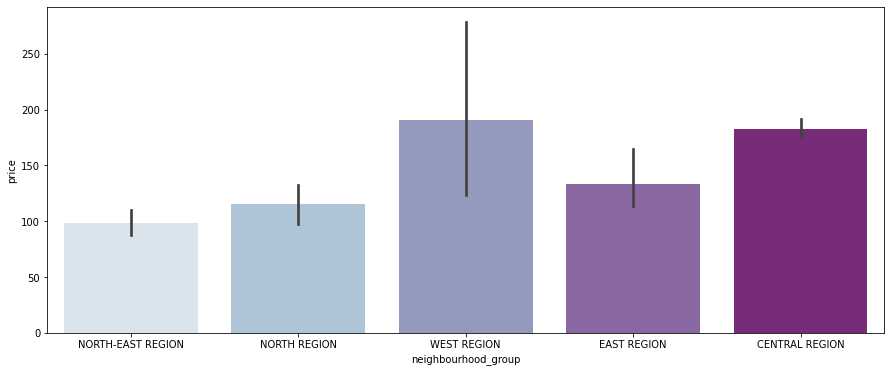

In [ ]:
#NEIGHBOURHOOD GROUP VS PRICE - BARCHART

plt.figure(figsize=(15,6))
result = data_filtered.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=data_filtered, order=result['neighbourhood_group'],palette='BuPu') 
plt.show()

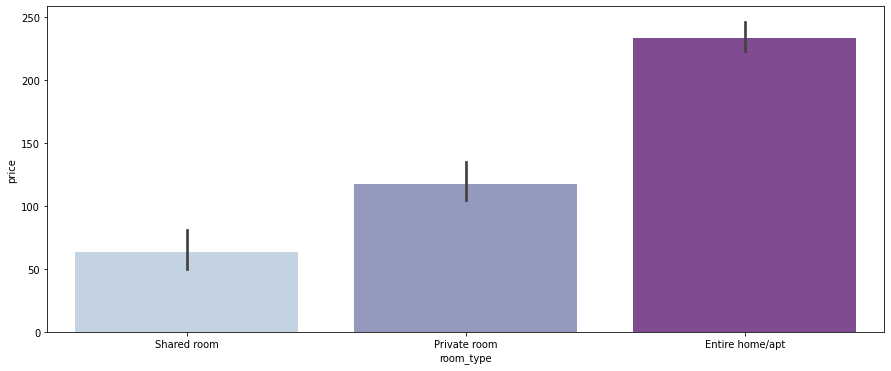

In [ ]:
#ROOM TYPE VS PRICE - BARCHART

plt.figure(figsize=(15,6))
result = data_filtered.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=data_filtered, order=result['room_type'],palette='BuPu') 
plt.show()

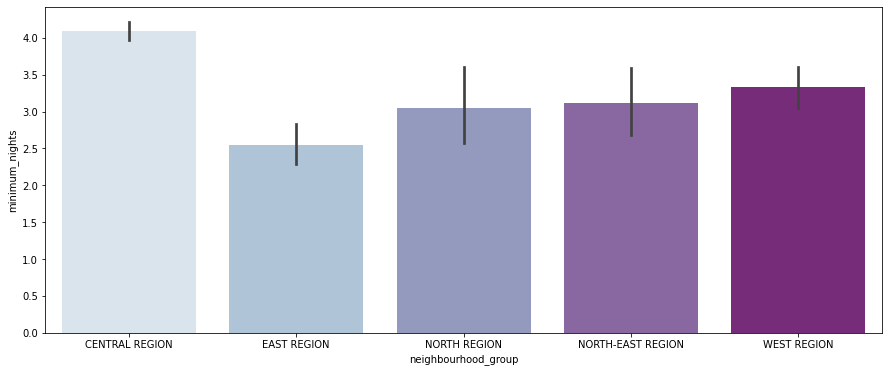

In [ ]:
#neighbourhood_group VS minimum_nights -BARCHART
plt.figure(figsize=(15,6))
result = data_filtered.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=data_filtered, order=result['neighbourhood_group'],palette='BuPu') 
plt.show()

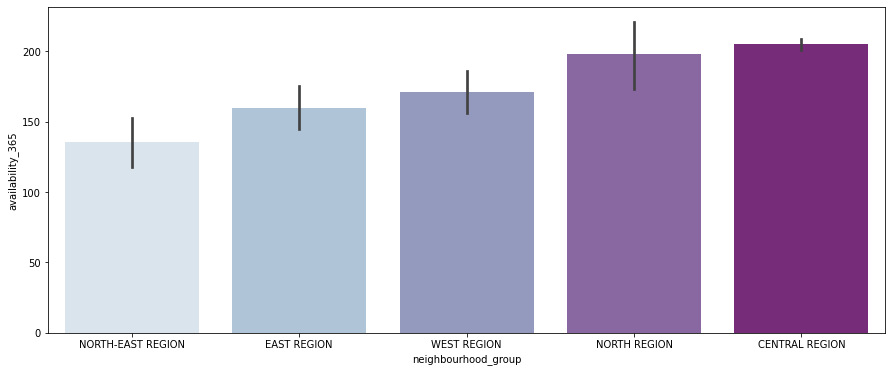

In [ ]:
#neighbourhood_group - availability_365 BARCHART
plt.figure(figsize=(15,6))
result = data_filtered.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=data_filtered, order=result['neighbourhood_group'],palette='BuPu')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


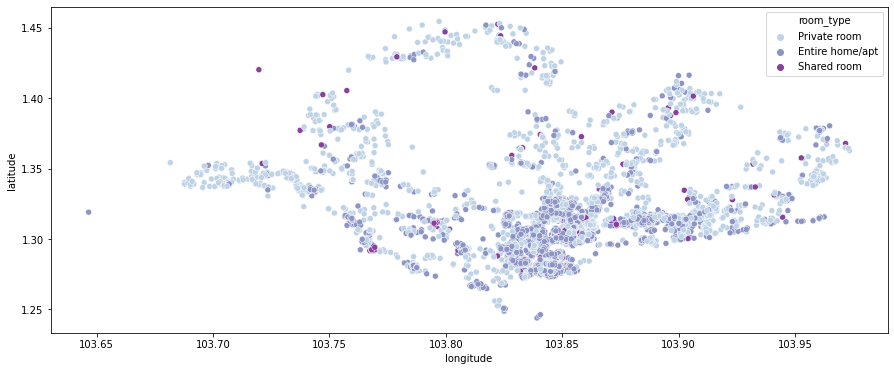

In [ ]:
#ROOM TYPE VS LOCATION - SCATTERPLOT

plt.figure(figsize=(15,6))
sns.scatterplot(data_filtered.longitude,data_filtered.latitude,hue=data_filtered.room_type,palette='BuPu')

NORMALISATION 

In [ ]:
#Find mean and variance of all coloumns 
print(data_filtered.mean())
print('\n\n')
print(data_filtered.var())

id                                2.347083e+07
host_id                           9.467116e+07
latitude                          1.314223e+00
longitude                         1.038498e+02
price                             1.749937e+02
minimum_nights                    3.879231e+00
number_of_reviews                 1.404631e+01
calculated_host_listings_count    3.552954e+01
availability_365                  1.971526e+02
dtype: float64



id                                1.026802e+14
host_id                           7.032057e+15
latitude                          8.697911e-04
longitude                         1.842927e-03
price                             1.278029e+05
minimum_nights                    1.878507e+01
number_of_reviews                 9.408092e+02
calculated_host_listings_count    3.029816e+03
availability_365                  2.196499e+04
dtype: float64


In [ ]:
from sklearn.preprocessing import normalize
x=np.array([data_filtered['price'],data_filtered['minimum_nights']])
normalized_X = normalize(x)
print(normalized_X)
data_filtered= data_filtered.drop(['price','minimum_nights'],axis=1)
data_filtered.insert(4,'price',normalized_X[0])
data_filtered.insert(5,'minimum_nights',normalized_X[1])
data_filtered.head()

[[0.00215034 0.00641985 0.00292944 ... 0.00311643 0.01714037 0.0017452 ]
 [0.01279498 0.0021325  0.0021325  ... 0.00639749 0.01279498 0.02985495]]


,id,name,host_id,host_name,price,minimum_nights,neighbourhood_group,neighbourhood,latitude,longitude,room_type,number_of_reviews,calculated_host_listings_count,availability_365
2,56334,COZICOMFORT,266763,FRANCESCA,0.002150,0.012795,NORTH REGION,WOODLANDS,1.44246,103.79667,Private room,20,2,365
3,71609,ENSUITE ROOM (ROOM 1 & 2) NEAR EXPO,367042,BELINDA,0.006420,0.002132,EAST REGION,TAMPINES,1.34541,103.95712,Private room,14,9,353
4,71896,B&B ROOM 1 NEAR AIRPORT & EXPO,367042,BELINDA,0.002929,0.002132,EAST REGION,TAMPINES,1.34567,103.95963,Private room,22,9,355
5,71903,ROOM 2-NEAR AIRPORT & EXPO,367042,BELINDA,0.003241,0.002132,EAST REGION,TAMPINES,1.34702,103.96103,Private room,39,9,346
6,71907,3RD LEVEL JUMBO ROOM 5 NEAR EXPO,367042,BELINDA,0.006482,0.002132,EAST REGION,TAMPINES,1.34348,103.96337,Private room,25,9,172


In [ ]:
print(data_filtered.price.mean())
print(data_filtered.price.var())
print("\n")
print(data_filtered.minimum_nights.mean())
print(data_filtered.minimum_nights.var())

0.005453557410178848
0.00012412396141410291


0.008272446909665972
8.542591842190334e-05


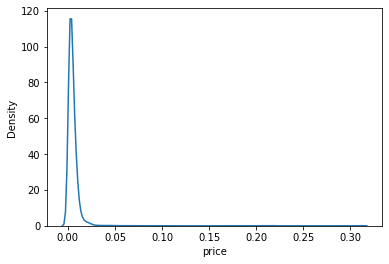

In [ ]:
sns.kdeplot(data_filtered.price)

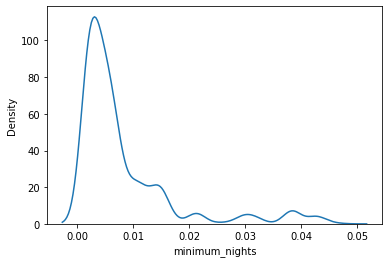

In [ ]:
sns.kdeplot(data_filtered.minimum_nights)

**HYPOTHESIS TESTING**

In [ ]:
from statsmodels.stats import weightstats as mstats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#H0=THE MEAN PRICE OF THE ROOMS IN THE EAST REGION AND WEST REGION IS EQUALTO THE POPULATION MEAN
#H1=THE MEAN PRICE OF THE ROOMS IN THE EAST REGION AND WEST REGION IS SMALLER THAN THE POPULATION MEAN

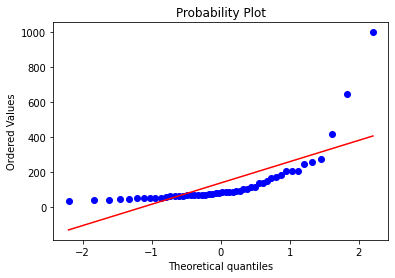

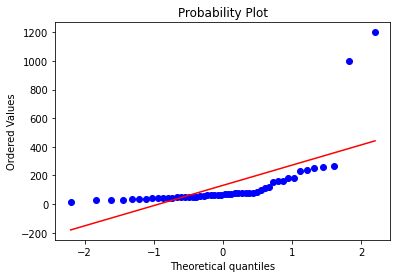

In [ ]:
dt = pd.read_csv("AirbnbData.csv")
east = dt[dt['neighbourhood_group'] == 'East Region']
east=east[:50]#The first 50 rooms from the east region
fig = plt.figure()
res = stats.probplot(east['price'], plot=plt)
plt.show()
west=dt[dt['neighbourhood_group'] == 'West Region']
west=west[:50]#The first 50 rooms from west region
fig = plt.figure()
res = stats.probplot(west['price'], plot=plt)
plt.show()

In [ ]:
#The zscore values for the east and west regions
print(stats.zscore(east['price']))
print(stats.zscore(west['price']))

[ 4.11078845e-01 -2.80224918e-01 -2.18501368e-01  4.23423555e-01
 -5.51808540e-01 -5.27119120e-01 -6.01187380e-01  1.71344576e+00
 -5.57980895e-01 -2.18501368e-01 -6.32049155e-01  2.25908194e-01
  4.11078845e-01  8.55488407e-01 -4.16016729e-01 -4.34533794e-01
 -3.04914339e-01 -3.04914339e-01  7.44386017e-01 -4.40706149e-01
 -1.32088398e-01 -4.40706149e-01 -2.80224918e-01 -2.46894201e-03
 -5.14774410e-01 -3.60465534e-01 -3.60465534e-01 -3.78982599e-01
 -1.48136521e-02 -1.25916043e-01  1.76529354e-01  6.82662466e-01
 -4.59223214e-01  5.31192874e+00  6.54269633e-02 -5.14774410e-01
 -4.46878504e-01 -4.46878504e-01 -4.46878504e-01 -3.04914339e-01
 -4.34533794e-01  3.15160448e+00 -5.27119120e-01 -5.27119120e-01
 -3.78982599e-01 -5.88842670e-01 -3.35776114e-01 -4.34533794e-01
 -4.90084990e-01  2.62942324e-01]
[-0.37208169 -0.39120202 -0.23345927 -0.3386211  -0.06137627 -0.31950077
 -0.29560035 -0.47246344  5.11067392 -0.47724352 -0.41510244 -0.38642194
  0.12982706  0.1202669  -0.31472069  0.

In [ ]:
#calculating the mean price of the population, eat region an  the west region
population_mean=data['price'].mean()
east_mean=east['price'].mean()
west_mean=west['price'].mean()
print(population_mean,east_mean)
print(population_mean,west_mean)
#pvalues
zstat, pvalue = mstats.ztest(east['price'],x2=None,value=population_mean,alternative='smaller')
print(float(pvalue))
zstat, pvalue = mstats.ztest(west['price'],x2=None,value=population_mean,alternative='smaller')
print(float(pvalue))

169.33299607942328 139.4
169.33299607942328 130.84
0.09795373765230686
0.0988733107772255


In [ ]:
#The pvalue for the H0 hypothesis is 0.09.This indicates that the possibility of H0 being true is very small and thus it can be rejected.

CORRELATION BETWEEN COLUMNS 

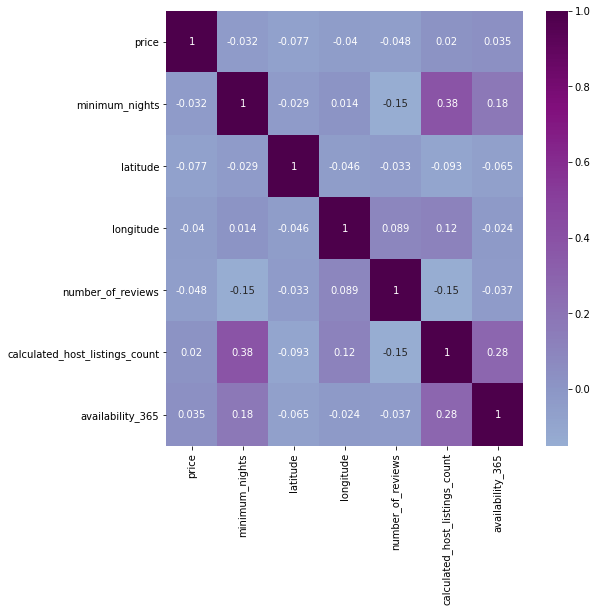

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data_filtered.drop(['id','host_id'], axis=1).corr(),annot=True,cmap='BuPu',center=0)